In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def hierarchical_depth_segmentation(image_path, num_buckets, output_dir):
    # Load the depth map as a grayscale image (1 channel for intensity instead of 3 for rgb)
    depth_map = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if depth_map is None:
        raise ValueError("Could not load image. Ensure the path is correct.")
    
    # Converts 2d image into 1d array of pixels
    # Also converts into float32 because that's what K-means requires as input
    pixels = depth_map.reshape(-1, 1).astype(np.float32)


    # This indicates when K-means should stop, stop after either 10 iterations or cluster center moves less than 1.0
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    # Run k-means 
    _, labels, centers = cv2.kmeans(pixels, num_buckets, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Reshape labels back to image dimensions
    clustered_map = labels.reshape(depth_map.shape)

    # a Center is the depth value of all pixels assigned to a bucket, 
    # turn them into grayscale values to be interpreted
    centers = np.uint8(centers) 
    
    # Create output directory if one doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Generate segmented images for each bucket
    # Create binary mask where pixels in cluster i are set to white
    for i in range(num_buckets):
        # Set all pixels in bucket i to white
        segment_mask = np.uint8(clustered_map == i) * 255
        # get outpuit path to write to
        output_path = os.path.join(output_dir, f'segment_{i}.png')
        # Write the image to that path
        cv2.imwrite(output_path, segment_mask)

        # Display the segmented image using matplotlib
        plt.figure(figsize=(5, 5))
        plt.imshow(segment_mask, cmap='plasma')
        plt.title(f"Segment {i}")
        plt.axis('off')
        plt.show()
    
    print(f"Saved {num_buckets} segmented images in {output_dir}")

# Example usage
# hierarchical_depth_segmentation("depth.png", 3, "output_buckets")


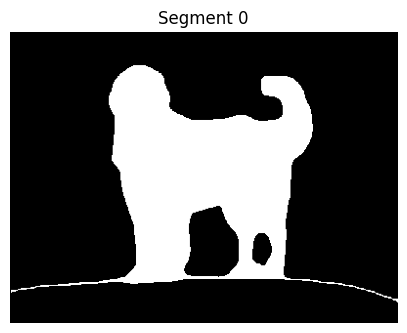

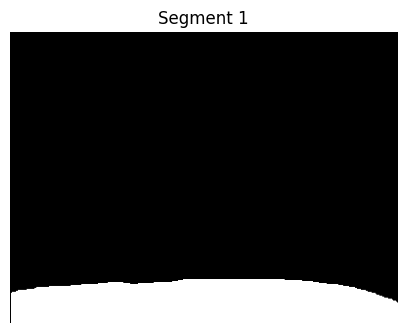

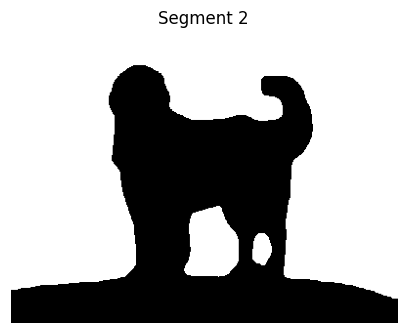

Saved 3 segmented images in output_buckets


In [3]:
hierarchical_depth_segmentation("depth.png", 3, "output_buckets")